<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>How to change "Yes" and "No" to True and False?</h3>


<h3>Import data</h3>
<p>
You can find the "Diabetes" from the following link: <a href="https://www.kaggle.com/datasets/brandao/diabetes">https://www.kaggle.com/datasets/brandao/diabetes</a>.
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [158]:
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [159]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [160]:
import pandas as pd
import matplotlib.pylab as plt

This function will download the dataset into your browser


In [161]:
#This function will download the dataset into your browser 
# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())



<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [162]:
import sklearn as sklearn

filename = "diabetic_data.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [163]:
headers = ["EncounterId","PatientNbr","Race","Gender","Age","Weight","AdmissionTypeId",
           "DischargeDispositionId","AdmissionSourceId","TimeInHospital","PayerCode",
           "MedicalSpecialty","NumLabProcedures","NumProcedures","NumMedications",
           "NumberOutpatient","NumberEmergency","NumberInpatient","Diagnosis1","Diagnosis2",
           "Diagnosis3","NumberDiagnoses","MaxGluSerum","A1Cresult","Metformin","Repaglinide",
           "Nateglinide","Chlorpropamide","Glimepiride","Acetohexamide","Glipizide",
           "Glyburide","Tolbutamide","Pioglitazone","Rosiglitazone","Acarbose","Miglitol",
           "Troglitazone","Tolazamide","Examide","Citoglipton","Insulin","Glyburide-metformin",
           "Glipizide-metformin","Glimepiride-pioglitazone","Metformin-rosiglitazone","Metformin-pioglitazone",
           "Change","DiabetesMed","Readmitted"]

you will need to download the dataset; if you are running locally, please comment out the following


In [164]:
# await download(filename, "auto.csv")
# filename="auto.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set "df.columns" equal to the Python list "headers".


In [165]:
df = pd.read_csv(filename)
df.columns = headers

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [166]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Change,DiabetesMed,Readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the diabetes dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [167]:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(5)

,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Change,DiabetesMed,Readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<h2>Analyze data loss among restored dataframe.</h2>

Here we will investigate how much data we will lose after replacing it by mean and the most frequent value.

In [168]:
#this code creates new dataframes df2 df3_clean removes all nan values from columns
df2 = pd.read_csv(filename)
df2.columns = headers
df2.replace("?", np.nan, inplace = True)
#here we drops nan data in mentioned columns
df2.dropna(subset=["Race"], axis=0, inplace=True)
df2.dropna(subset=["TimeInHospital"], axis=0, inplace=True)
df2.dropna(subset=["Gender"], axis=0, inplace=True)
df2.dropna(subset=["NumLabProcedures"], axis=0, inplace=True)
df2.dropna(subset=["DiabetesMed"], axis=0, inplace=True)
df2.to_csv('toCheck.csv1')
df3_clean = df2.copy()

#this part generates nan values among columns
l = [0.15, 0.1, 0.12, 0.1, 0.01]
col = ['Race', 'TimeInHospital', 'Gender', 'NumLabProcedures', 'DiabetesMed']
for i in range(len(l)):
    m = np.random.rand(len(df2))
    mask = m < l[i]
    df2.loc[mask, col[i]] = np.NaN


After adding nan values we need to restore columns by different methods.

In [169]:
# replacing nan values by the most frequent value
avg_race = df2['Race'].value_counts().idxmax()
df2['Race'].replace(np.nan, avg_race, inplace=True)

avg_gender = df2['Gender'].value_counts().idxmax()
df2['Gender'].replace(np.nan, avg_gender, inplace=True)

diabetes_meds = df2['DiabetesMed'].value_counts().idxmax()
df2['DiabetesMed'].replace(np.nan, diabetes_meds, inplace=True)

# replacing nan values mean value
lab_procedures = df2['NumLabProcedures'].astype('float').mean(axis=0)
df2['NumLabProcedures'].replace(np.nan, lab_procedures, inplace=True)

avg_time_in_hospital = df2['TimeInHospital'].astype('float').mean(axis=0)
df2['TimeInHospital'].replace(np.nan, avg_time_in_hospital, inplace=True)

To find error we will use sklearn.metrics, .mean_absolute_percentage_error for float variables and .recall_score for object values.

In [170]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import recall_score
import math

cm = recall_score(df3_clean['Race'],df2['Race'],average='micro')
print("Error of Race :", math.trunc((1 - cm)*100),'%')

cm = recall_score(df3_clean['Gender'],df2['Gender'],average='micro')
print("Error of Gender :", math.trunc((1 - cm)*100),'%')

cm = recall_score(df3_clean['DiabetesMed'],df2['DiabetesMed'],average='micro')
print("Error of DiabetesMed : ", math.trunc((1 - cm)*100),'%')

num_lab_procedures_error = mean_absolute_percentage_error(df2['NumLabProcedures'], df3_clean['NumLabProcedures'])
print('Error of NumLabProcedures: ', math.trunc(num_lab_procedures_error*100),'%')

time_in_hospital_error = mean_absolute_percentage_error(df2['TimeInHospital'], df3_clean['TimeInHospital'])
print('Error of TimeInHospital: ', math.trunc(time_in_hospital_error*100),'%')

Error of Race : 3 %
Error of Gender : 5 %
Error of DiabetesMed :  0 %
Error of NumLabProcedures:  3 %
Error of TimeInHospital:  5 %


As we can notice error is low, from 0.2% to 5.3%. So we can rely on this type of data recovering.

<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [171]:
missing_data = df.isnull()
missing_data.head(5)

,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Change,DiabetesMed,Readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [172]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

EncounterId
False    101766
Name: EncounterId, dtype: int64

PatientNbr
False    101766
Name: PatientNbr, dtype: int64

Race
False    99493
True      2273
Name: Race, dtype: int64

Gender
False    101766
Name: Gender, dtype: int64

Age
False    101766
Name: Age, dtype: int64

Weight
True     98569
False     3197
Name: Weight, dtype: int64

AdmissionTypeId
False    101766
Name: AdmissionTypeId, dtype: int64

DischargeDispositionId
False    101766
Name: DischargeDispositionId, dtype: int64

AdmissionSourceId
False    101766
Name: AdmissionSourceId, dtype: int64

TimeInHospital
False    101766
Name: TimeInHospital, dtype: int64

PayerCode
False    61510
True     40256
Name: PayerCode, dtype: int64

MedicalSpecialty
False    51817
True     49949
Name: MedicalSpecialty, dtype: int64

NumLabProcedures
False    101766
Name: NumLabProcedures, dtype: int64

NumProcedures
False    101766
Name: NumProcedures, dtype: int64

NumMedications
False    101766
Name: NumMedications, dtype: int64

NumberO

Based on the summary above, each column has 101766 rows of data and seven of the columns containing missing data:

<ol>
    <li>"Race": 2273 missing data</li>
    <li>"Weights": 98569 missing data</li>
    <li>"PayerCode": 40256 missing data</li>
    <li>"MedicalSpecialty" : 49949 missing data</li>
    <li>"Diagnosis1": 21 missing data</li>
    <li>"Diagnosis2": 358 missing data</li>
    <li>"Diagnosis3": 1423 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply some of these methods to different columns:

<b>Replace by frequency:</b>
<ul>
    <li>"Race": 2273 missing data
        <ul>
            <li>Reason: "Race" column cannot be replaced by mean value, so the obvious decision would be to find the most frequent value and replace Nan data.</li>
        </ul>
    </li>
    <li>"PayerCode": 40256 missing data
        <ul>
            <li>Reason: "PayerCode" column cannot be replaced by mean value, and 40256 rows are too much to simply throw away. So just replace empty rows with the most frequent value.</li>
        </ul>
    </li>
    <li>"MedicalSpecialty" : 49949 missing data</li>
     <ul>
            <li>Reason: "MedicalSpecialty" column cannot be replaced by mean value, and thrown away. So replace them with the most frequent value.</li>
        </ul>
    <li>"Diagnosis2": 358 missing data, replace it with the most frequent value.</li>
    <li>"Diagnosis3": 1423 missing data, replace it with the most frequent value.</li>
</ul>
<b>Drop the whole row:</b>
<ul>
    <li>"Diagnosis1": 21 missing rows is not much, so simply delete them.</li>
</ul>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "PayerCode" column with the most frequent value.</b>

</div>

In [173]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
#Calculate the most frequent vaule for "PayerCode" column
avg_payer_code = df["PayerCode"].value_counts().idxmax()
print("Average payer code:", avg_payer_code)

# Replace "NaN" with the mean value in the "PayerCode" column</h4>

df['PayerCode'].replace(np.nan, avg_payer_code, inplace=True)
```
</details>

<h4>Calculating the mean value for column</h4>

<h4>Replace "NaN" with the mean value in the column</h4>

<h4>Calculate the most frequent value for the "Race",Diagnosis2","Diagnosis3" column</h4>

In [174]:
avg_race = df['Race'].value_counts().idxmax()
avg_diagnosis_2 = df['Diagnosis2'].value_counts().idxmax()
avg_diagnosis_3 = df['Diagnosis3'].value_counts().idxmax()

print("Average Race:", avg_race)
print("Average second diagnosis:", avg_diagnosis_2)
print("Average third diagnosis:", avg_diagnosis_3)


Average Race: Caucasian
Average second diagnosis: 276
Average third diagnosis: 250


<h4>Replace "NaN" with the mean value in the "Race",Diagnosis2","Diagnosis3" column</h4>


In [175]:
df['Race'].replace(np.nan, avg_race, inplace=True)
df['Diagnosis2'].replace(np.nan, avg_diagnosis_2, inplace=True)
df['Diagnosis3'].replace(np.nan, avg_diagnosis_3, inplace=True)

<h4>Calculate the most frequent value for "PayerCode" column</h4>


In [176]:
avg_payer_code = df["PayerCode"].value_counts().idxmax()
print("Average payer code:", avg_payer_code)
print(df["PayerCode"].value_counts())


Average payer code: MC
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: PayerCode, dtype: int64


<h4>Replace "NaN" with the mean value in the "PayerCode" column</h4>


In [177]:
df['PayerCode'].replace(np.nan, avg_payer_code, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [178]:
df['MedicalSpecialty'].value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: MedicalSpecialty, Length: 72, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [179]:
df['MedicalSpecialty'].value_counts().idxmax()

'InternalMedicine'

The replacement procedure is very similar to what we have seen previously:


In [180]:
#replace the missing "MedicalSpecialty' values by the most frequent
df["MedicalSpecialty"].replace(np.nan, "InternalMedicine", inplace=True)

Finally, let's drop all rows that do not have "Diagnosis1" data:

In [181]:
# simply drop whole row with NaN in "Diagnosis1" column
df.dropna(subset=["Diagnosis1"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [182]:
df.head()


,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Change,DiabetesMed,Readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [183]:
df.dtypes

EncounterId                  int64
PatientNbr                   int64
Race                        object
Gender                      object
Age                         object
Weight                      object
AdmissionTypeId              int64
DischargeDispositionId       int64
AdmissionSourceId            int64
TimeInHospital               int64
PayerCode                   object
MedicalSpecialty            object
NumLabProcedures             int64
NumProcedures                int64
NumMedications               int64
NumberOutpatient             int64
NumberEmergency              int64
NumberInpatient              int64
Diagnosis1                  object
Diagnosis2                  object
Diagnosis3                  object
NumberDiagnoses              int64
MaxGluSerum                 object
A1Cresult                   object
Metformin                   object
Repaglinide                 object
Nateglinide                 object
Chlorpropamide              object
Glimepiride         

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings should have type 'object'. For example, 'Gender', 'Age' variables are Object values that descraibes categorical data, so we should expect them to be 'category' type. We have to convert data types into a proper format for each column using the "astype()" method.</p>


<h4>Convert data types to proper format</h4>


In [184]:
df[["Gender", "Age"]] = df[["Gender", "Age"]].astype("category")

<h4>Let us list the columns after the conversion</h4>


In [185]:
df.dtypes

EncounterId                    int64
PatientNbr                     int64
Race                          object
Gender                      category
Age                         category
Weight                        object
AdmissionTypeId                int64
DischargeDispositionId         int64
AdmissionSourceId              int64
TimeInHospital                 int64
PayerCode                     object
MedicalSpecialty              object
NumLabProcedures               int64
NumProcedures                  int64
NumMedications                 int64
NumberOutpatient               int64
NumberEmergency                int64
NumberInpatient                int64
Diagnosis1                    object
Diagnosis2                    object
Diagnosis3                    object
NumberDiagnoses                int64
MaxGluSerum                   object
A1Cresult                     object
Metformin                     object
Repaglinide                   object
Nateglinide                   object
C

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>The code for unit conversion is:<p>
df['DiabetesMed'] = 'Yes' == df["DiabetesMed"]
<p>If we need to, we can do many mathematical operations directly in Pandas.</p>


In [186]:
df.head()

,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Change,DiabetesMed,Readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>

</div>


In [187]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Convert Yes, No values to Boolean True, False
df['DiabetesMed'] = 'Yes' == df["DiabetesMed"]
# rename column name from "DiabetesMed" to "DiabetesMedication"

df.rename(columns={'DiabetesMed':'DiabetesMedication'}, inplace=True)

# check your transformed data
df.head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "NumberDiagnoses" and "NumLabProcedures".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [188]:
import scipy.stats as stats

df['NumberDiagnoses'] = df['NumberDiagnoses']/df['NumberDiagnoses'].max()


<h2>Testing for normality using statistical tests</h2>

Here we will check the normality of the sample distribution using such tests as: the Shapiro–Wilk test, the Kolmogorov–Smirnov test, and the D'Agostino's test.

In [189]:
values = df["NumberDiagnoses"]

results = {
    "Shapiro–Wilk test" : stats.shapiro(values),
    "Kolmogorov–Smirnov" : stats.kstest(values, "norm"),
    "D'Agostino's test" : stats.normaltest(values)
}

pd.DataFrame.from_dict(results, orient = "index", columns = ["Test statistics", "Value p"])

c:\users\s\pycharmprojects\pythonproject2\venv\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test statistics,Value p
Shapiro–Wilk test,0.805627,0.0
Kolmogorov–Smirnov,0.562159,0.0
D'Agostino's test,9864.112639,0.0


According to the results of the tests, it can be reliably stated that this sample does not have a normal distribution law.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "NumLabProcedures".</b>

</div>


In [190]:
# Write your code below and press Shift+Enter to execute

<details><summary>Click here for the solution</summary>

```python
df['NumLabProcedures'] = df['NumLabProcedures']/df['NumLabProcedures'].max()

# show the scaled columns
df[["NumberDiagnoses","NumLabProcedures"]].head()

```

</details>

Here we can see we've normalized "NumberDiagnoses" and "NumLabProcedures" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Age" is a real valued variable ranging from 0 to 100 and it has 10 unique values. What if we only care about the diabetes among 4 age groups child, young adults, middle-aged adults and old-aged adults? Can we rearrange them into four ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'Age' column into 4 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [191]:
df["Age"]=df["Age"].astype('category', copy=True)

Let's plot the histogram of age to see what the distribution of age looks like.


Text(0.5, 1.0, 'age distribution')

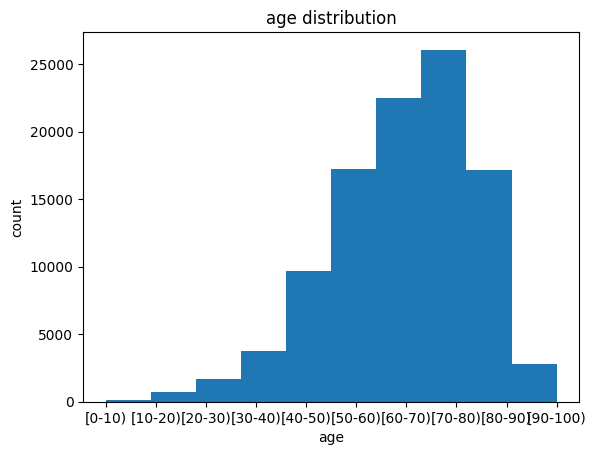

In [192]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Age"])

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age distribution")

<p>Since we are building 4 bins, there should be 5 dividers, so numbers_generated = 5.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.



We set group  names:


In [193]:
group_names = ['Child', 'Young Adults', 'Middle-Aged Adults',
            'Old-Aged Adults']

We apply the function "cut" to determine what each value of `df['Age']` belongs to.


In [194]:
df['ages-binned'] = pd.cut(df['Age'].astype('string').str[1:2].astype('int64'), bins=[0,1,2,4,10], labels=group_names, include_lowest=True)
df[['Age','ages-binned']].head(20)

,Age,ages-binned
0,[0-10),Child
1,[10-20),Child
2,[20-30),Young Adults
3,[30-40),Middle-Aged Adults
4,[40-50),Middle-Aged Adults
5,[50-60),Old-Aged Adults
6,[60-70),Old-Aged Adults
7,[70-80),Old-Aged Adults
8,[80-90),Old-Aged Adults
9,[90-100),Old-Aged Adults


This code fragment is used, because "Age" is a category. So that we will select 1 element of string from each occurrence. As a result we are able to represent category as 1d array for function to proceed.

Let's see the number of patients in each bin:

In [195]:
df["ages-binned"].value_counts()

Old-Aged Adults       85779
Middle-Aged Adults    13458
Young Adults           1656
Child                   852
Name: ages-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'age groups bins')

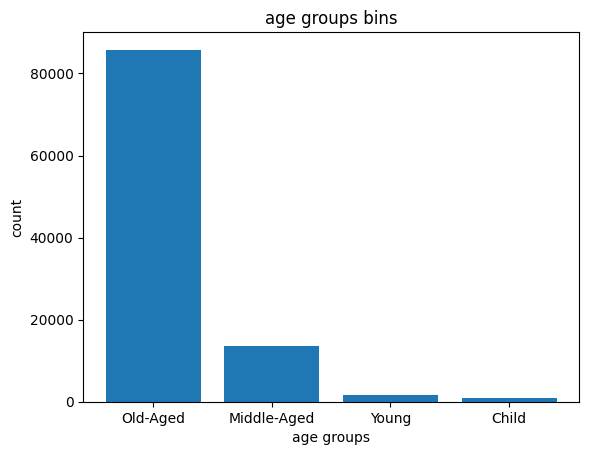

In [196]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(['Old-Aged', 'Middle-Aged', 'Young','Child'], df["ages-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("age groups")
plt.pyplot.ylabel("count")
plt.pyplot.title("age groups bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "Age" based on 4 categories ("Old-Aged", "Middle-Aged", "Young","Child").
</p>
<p>
    We successfully narrowed down the intervals from 10 to 4!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'age groups bins')

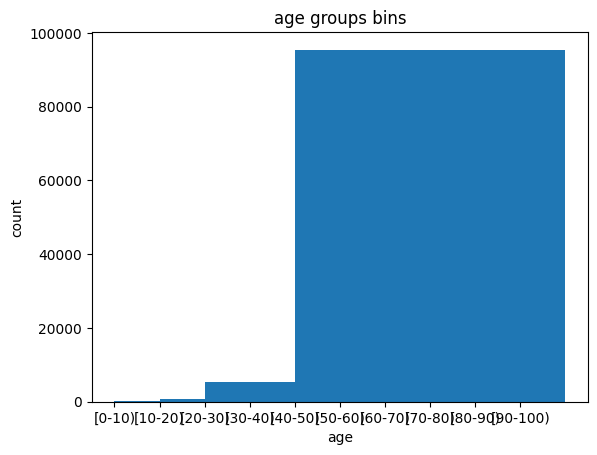

In [206]:
# age group bins переробити на мої ті групи в плані ті що вище
%matplotlib inline
import matplotlib as plt

# draw historgram of attribute "age" with 4 selected bins (0,1,2,4,10)
plt.pyplot.hist(df["Age"], bins = [0,1,2,4,10])

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age groups bins")

The plot above shows the binning result for the attribute "Age".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "Change" has two unique values: "Ch" or "No". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "change" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of change type.
</p>


In [198]:
df.columns

Index(['EncounterId', 'PatientNbr', 'Race', 'Gender', 'Age', 'Weight',
       'AdmissionTypeId', 'DischargeDispositionId', 'AdmissionSourceId',
       'TimeInHospital', 'PayerCode', 'MedicalSpecialty', 'NumLabProcedures',
       'NumProcedures', 'NumMedications', 'NumberOutpatient',
       'NumberEmergency', 'NumberInpatient', 'Diagnosis1', 'Diagnosis2',
       'Diagnosis3', 'NumberDiagnoses', 'MaxGluSerum', 'A1Cresult',
       'Metformin', 'Repaglinide', 'Nateglinide', 'Chlorpropamide',
       'Glimepiride', 'Acetohexamide', 'Glipizide', 'Glyburide', 'Tolbutamide',
       'Pioglitazone', 'Rosiglitazone', 'Acarbose', 'Miglitol', 'Troglitazone',
       'Tolazamide', 'Examide', 'Citoglipton', 'Insulin',
       'Glyburide-metformin', 'Glipizide-metformin',
       'Glimepiride-pioglitazone', 'Metformin-rosiglitazone',
       'Metformin-pioglitazone', 'Change', 'DiabetesMed', 'Readmitted',
       'ages-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [199]:
dummy_variable_1 = pd.get_dummies(df["Change"])
dummy_variable_1.head()

,Ch,No
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


Change the column names for clarity:


In [200]:
dummy_variable_1.rename(columns={'Ch':'change_yes', 'No':'change_no'}, inplace=True)
dummy_variable_1.head()

,change_yes,change_no
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In the dataframe, column 'change' has values for 'yes' and 'no' as 0s and 1s now.


In [201]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "change" from "df"
df.drop("Change", axis = 1, inplace=True)

In [202]:
df.head()

,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,...,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,DiabetesMed,Readmitted,ages-binned,change_yes,change_no
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,NO,Child,0,1
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,No,No,No,No,Yes,>30,Child,1,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,Yes,NO,Young Adults,0,1
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,No,No,No,No,Yes,NO,Middle-Aged Adults,1,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,No,No,No,No,Yes,NO,Middle-Aged Adults,1,0


The last two columns are now the indicator variable representation of the change variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "Rosiglitazone"</b>

</div>


In [203]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['Rosiglitazone'])

# change column names for clarity
dummy_variable_2.rename(columns={'Down':'Increased', 'Up': 'Decreased'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

```
</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'Rosiglitazone'.</b>

</div>


In [204]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "Rosiglitazone" from "df"
df.drop('Rosiglitazone', axis = 1, inplace=True)

```
</details>


In [205]:
df.to_csv('clean_df.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
